In [1]:
# Install dependencies with pip (needed for Codespaces)
!pip install qiskit matplotlib pylatexenc qiskit_ibm_runtime

  Using cached qiskit-1.0.2-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached matplotlib-3.8.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached qiskit_ibm_runtime-0.23.0-py3-none-any.whl.metadata (19 kB)
  Using cached rustworkx-0.14.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (10.0 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached stevedore-5.2.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached contourpy-1.2.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.51.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadat

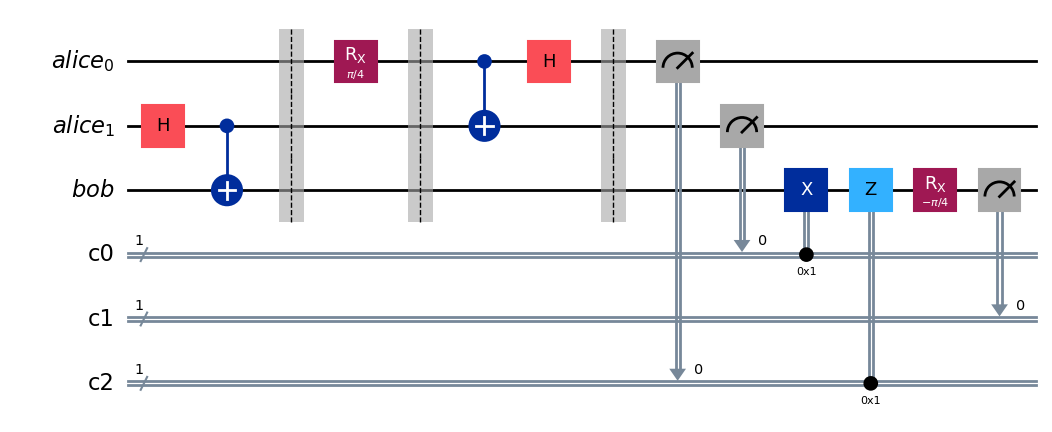

In [2]:
# QUANTUM TELEPORTATION ALGORITHM

# import QuantumCircuit class from qiskit library
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from math import pi

# create a circuit with 3 qubits
# alice wants to send a qubit to bob
alice_register = QuantumRegister(2, name="alice")
bob_register = QuantumRegister(1, name="bob")
qc = QuantumCircuit(alice_register, bob_register)

# CREATE A BELL PAIR, INSTANTIATE THE ENTANGLEMENT
# Hadamard Gate (H):       The Hadamard gate is a single-qubit gate 
#                           that puts a qubit into a superposition state.
# Controlled-NOT Gate (CX): The CNOT gate is a two-qubit gate where
#                            one qubit acts as the control and the other as the target.
#
# To measure the qubits, we create some classical registers.
qc.h(alice_register[1])
qc.cx(alice_register[1], bob_register[0])

alice_bell_classical_register = ClassicalRegister(1)
qc.add_register(alice_bell_classical_register)
bob_classical_register = ClassicalRegister(1)
qc.add_register(bob_classical_register)

# ψ represents the quantum state that Alice wants to teleport to Bob
# To create the state ψ, Alice applies a quarter of an X gate, 
# which means she applies an rx rotation by an angle of π/4 to her qubit.
# Classical register is added to the quantum circuit to store the measurement results later.
qc.barrier()
qc.rx(pi/4, alice_register[0])
alice_psi_classical_register = ClassicalRegister(1)
qc.add_register(alice_psi_classical_register)

# We are now at ψ_0, we apply our next two gates
qc.barrier()
qc.cx(alice_register[0], alice_register[1])
qc.h(alice_register[0])
qc.barrier()

# Measure Alice's quibits
# Send the information
qc.measure(alice_register[0], alice_psi_classical_register)
qc.measure(alice_register[1], alice_bell_classical_register)
qc.x(bob_register[0]).c_if(alice_bell_classical_register, 1) # Apply X to Bob if 2nd qubit measures to 1
qc.z(bob_register[0]).c_if(alice_psi_classical_register, 1) # Apply Z if 1st qubit measures to 1

# Finally, apply the -pi/4 gate to ensure we measure zeros
qc.rx(-pi/4, bob_register[0])
qc.measure(bob_register[0], bob_classical_register)

# Draw using LaTeX & Matplotlib
qc.draw(output='mpl')

d1d531734c99945c837f391d7b299905638fdfbc57ab14a42b49847cce2654658722a101063f72ecddf7727e0e64e985b63ea0802ca1e175f380a75dd9de6a2f
<IBMBackend('ibm_osaka')>


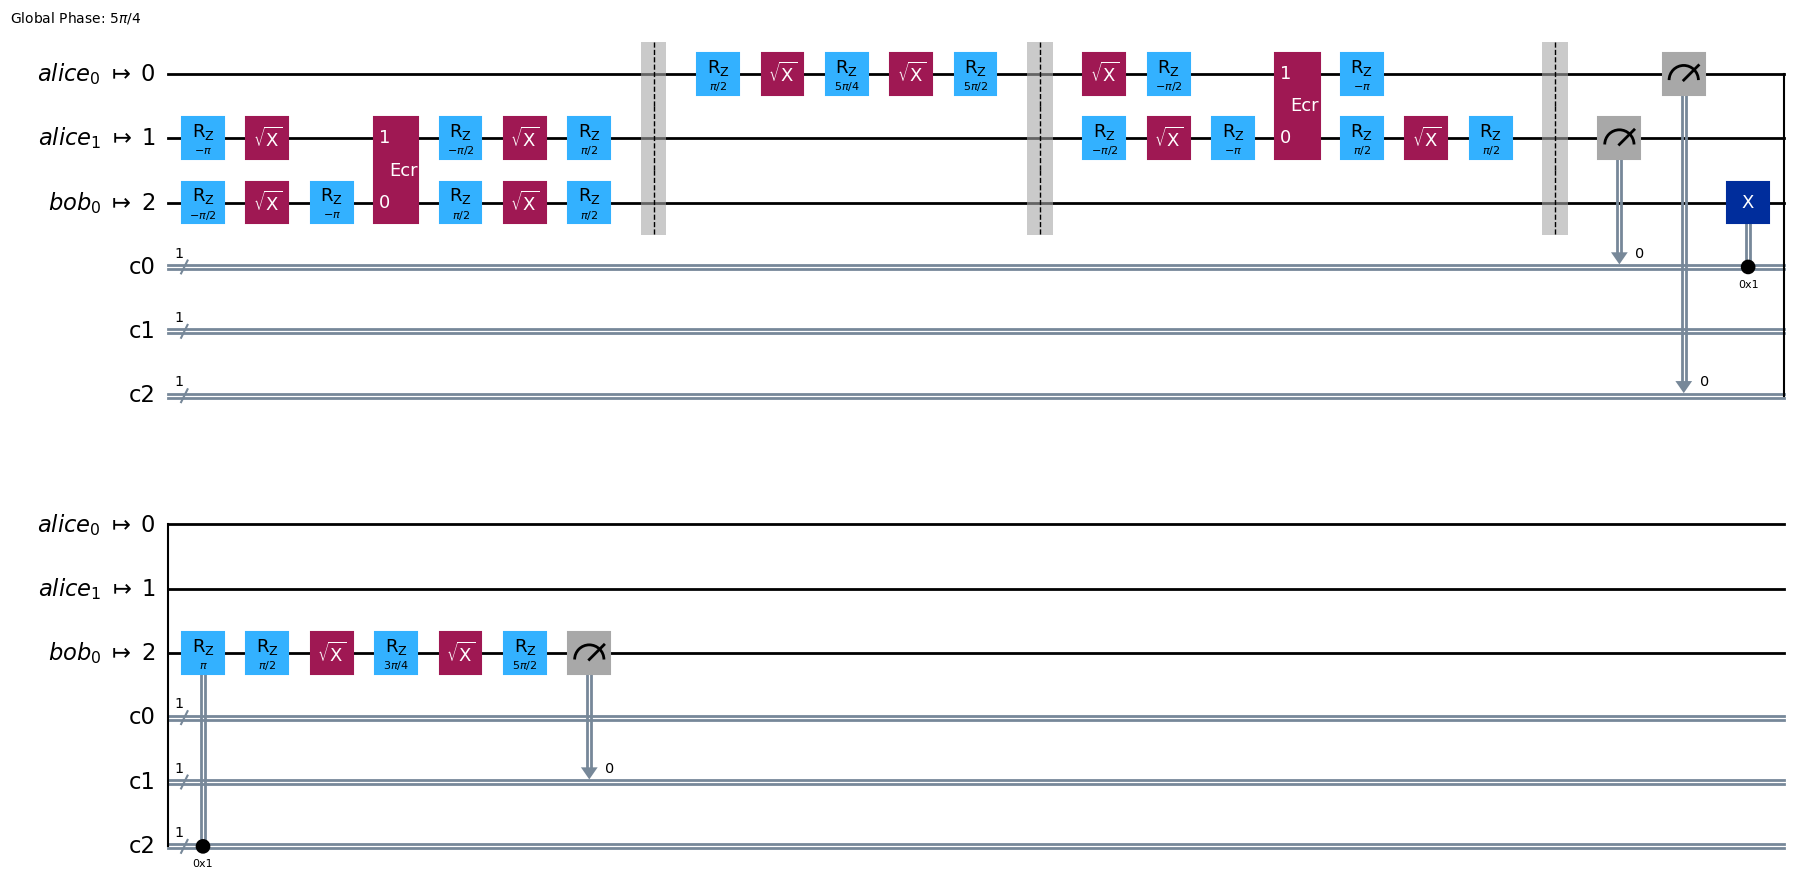

In [5]:
# Quantum IBM Connection for Running on Real Hardware
import json
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Read IBM key data from a JSON file
with open('key.json', 'r') as f:
    data = json.load(f)
IBM_TOKEN = data.get('IBM_QUANTUM_TOKEN')

# Call to IBM Service with key
service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token=IBM_TOKEN
)

backend = service.least_busy(simulator=False, operational=True)
print(backend)

# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
 
isa_circuit.draw('mpl', idle_wires=False)